In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [4]:
def controlled_Z(circuit, control, target):
    """ Implement a Z gate  with a single  control """
    circuit.h(target)
    circuit.cx(control, target)
    circuit.h(target)

In [5]:
def phase_oracle_00(circuit, registers):
    controlled_Z(circuit, registers[0], registers[1])
    circuit.x(registers[0])
    circuit.x(registers[1])

def phase_oracle_01(circuit, registers):
    controlled_Z(circuit, registers[0], registers[1])
    circuit.x(registers[0])

def phase_oracle_10(circuit, registers):
    controlled_Z(circuit, registers[0], registers[1])
    circuit.x(registers[1])

def phase_oracle_11(circuit, registers):
    controlled_Z(circuit, registers[0], registers[1])

In [6]:
def grover_diffusion(circuit, registers):
    # Apply  Hadamard  and X gates  on all  qubits
    circuit.h(registers)
    circuit.x(registers)
    
    # Create a barrier  that  isolates  different  sections  of the circuit
    circuit.barrier()
    
    # Apply  CZ gate  with  target  as  qubit
    controlled_Z(circuit , registers [0],  registers [1])
    
    circuit.barrier()
    
    circuit.x(registers)
    circuit.h(registers)

In [7]:
# Run  phase  oracle  and  diffusion  operators.
def run_tests(n_tests, groverCircuit, qr):
    for test in range(n_tests):
        groverCircuit.barrier()
        if(state_to_search == '00'):
            phase_oracle_00(groverCircuit, qr)
        elif(state_to_search == '01'):
            phase_oracle_01(groverCircuit, qr)
        elif(state_to_search == '10'):
            phase_oracle_10(groverCircuit, qr)
        elif(state_to_search == '11'):
            phase_oracle_11(groverCircuit, qr)
        groverCircuit.barrier()
        grover_diffusion(groverCircuit, qr)

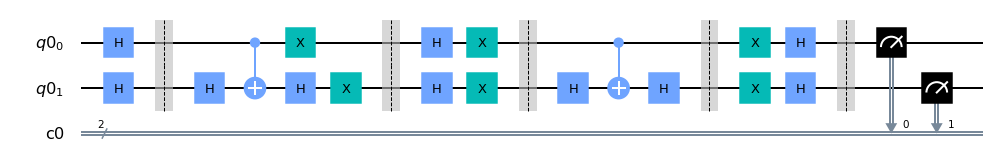

In [8]:
n_qubits = 2
n_tests = 1
state_to_search='00'

# Define  register  objects
qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
groverCircuit = QuantumCircuit(qr, cr)

# Initialize  circuit  with  Hadamard  gates
groverCircuit.h(qr)

#Run tests
run_tests(n_tests, groverCircuit, qr)

# Measure  quantum  registers
groverCircuit.barrier()
groverCircuit.measure(qr, cr)

# Draw circuit
groverCircuit.draw(output="mpl")

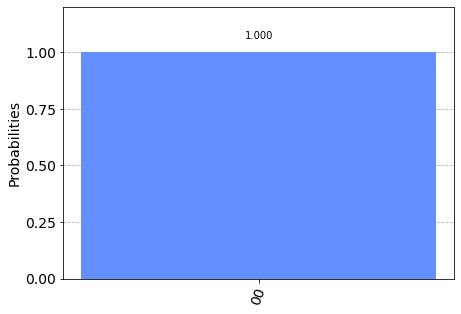

In [9]:
# Define  backend  that  will  simulate  quantum  circuit
backend = BasicAer.get_backend('qasm_simulator')

# Number  of  times  the  circuit  is run
shots = 1024

# Execute  circuit  and  plot  results  on  histogram
results = execute(groverCircuit , backend=backend , shots=shots).result()
answer = results.get_counts ()
plot_histogram(answer)